# Project Overview
### (English)

#### Visualize data and explore information to be used as material for improvising previous models.

# Ringkasan Project
### (Bahasa Indonesia)

#### Melakukan visualisasi data dan menggali informasi untuk digunakan sebagai bahan improvisasi model sebelumnya.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# load data
data_index = pd.read_csv('data/Train.csv').index
data = pd.read_csv('data/data_kos_malang_clean.csv').loc[data_index]
from sklearn.model_selection import train_test_split


# Visualization

### "Lokasi" => Histogram plot

In [3]:
# check value counts
data['Lokasi'].value_counts()

Lokasi
Lowokwaru    152
Klojen        13
Sukun         11
Blimbing       4
Name: count, dtype: int64

count data : 180


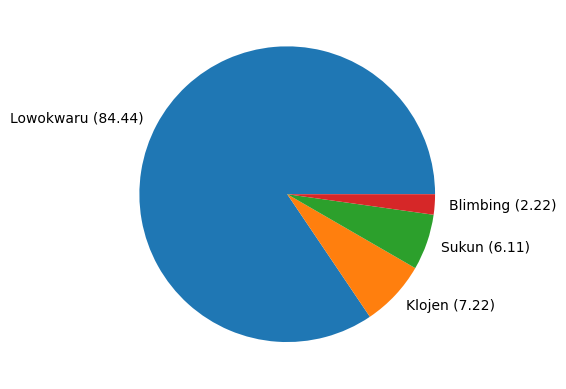

In [4]:
# set up labels
percentation = (data['Lokasi'].value_counts(normalize=True).values*100).tolist()
label_name = data['Lokasi'].value_counts(normalize=True).index
labels = list(f'{n} ({p:.2f})' for n,p in zip(label_name, percentation))

# visualization with pie chart
print(f'count data : {len(data)}')
plt.pie(x=data['Lokasi'].value_counts(),labels=labels)
plt.show()

#### Based on the information above, we get the fact that the majority of boarding houses in this data are located in Lowokwaru (85%) and the rest are in three locations, namely Klojen (7.5%), Sukun (5%) and Blimbing (2.5%).

#### Berdasarkan info diatas kita memperoleh fakta bahwa mayoritas kos yang ada dalam data ini berlokasi di Lowokwaru (85%) dan sisanya ada di tiga lokasi yaitu Klojen (7.5%), Sukun (5%) dan Blimbing (2.5%).

### Fasilitas => Bar plot & Histogram

In [5]:
# get data
new_values = []
counts = []

for d in data['Fasilitas']:
    V = d.split(', ')
    for v in V:
        new_values.append(v)
    
    counts.append(len(V))

In [6]:
# check value counts
from collections import Counter
data_facilities = Counter(new_values)
data_facilities

Counter({'Kasur': 173,
         'WiFi': 154,
         'Akses 24 Jam': 138,
         'Kloset Duduk': 69,
         'K. Mandi Dalam': 40,
         'AC': 1})

<Axes: >

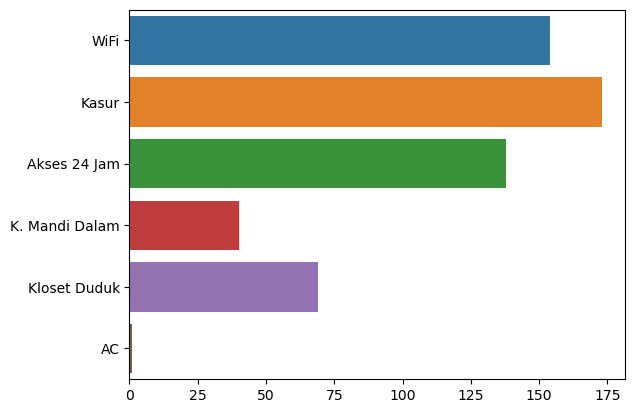

In [7]:
# facilities proportion
sns.barplot(x=list(data_facilities.values()), y=list(data_facilities.keys()))

#### The fact from the data above is that the 3 facilities that are often found in Malang city boarding houses are Wifi, mattresses & 24 hour access, followed by private bathrooms and sitting toilets. For air conditioning (AC), there are only less than 10 of the 240 boarding houses in Malang.

#### Fakta dari data diatas adalah 3 fasilitas yang banyak ditemui di kos kota malang yaitu Wifi, Kasur & Akses 24 jam, disusul dengan kamar mandi dalam dan kloset duduk, untuk AC sendiri hanya ada kurang dari 10 dari 240 kos yang ada di malang.

<Axes: ylabel='Count'>

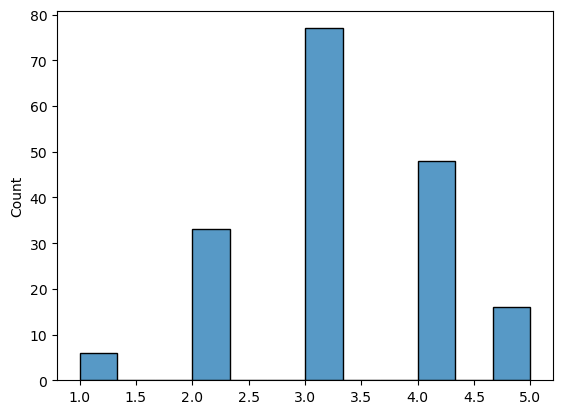

In [8]:
# count facilities
sns.histplot(data=counts)

#### So according to data around 100/240 boarding houses in Malang have 3/6 facilities. The facilities in question are (WiFi, Mattress, 24 Hour Access, Bathroom, Sitting Toilet, AC)
#### About 65/240 have 4/6 facilities
#### What's interesting is that there are boarding houses that have complete facilities but only a few
#### __________________________________________________________________________________________________

#### Jadi menurut data di atas sekitar 100/240 kos di malang memiliki 3/6 fasilitas. Fasilitas yang dimaksut adalah (WiFi, Kasur, Akses 24 Jam, K. Mandi Dalam, Kloset Duduk, AC)
#### Sekitar 65/240 memiliki 4/6 fasilitas
#### Yang menarik adalah ada kos yang memiliki fasilitas lengkap tapi cuma beberapa

### Ratings => Histogram plot (bins = (3,5,7,9,11))

In [9]:
# null proportion
data['Ratings'].isna().mean()

0.7833333333333333

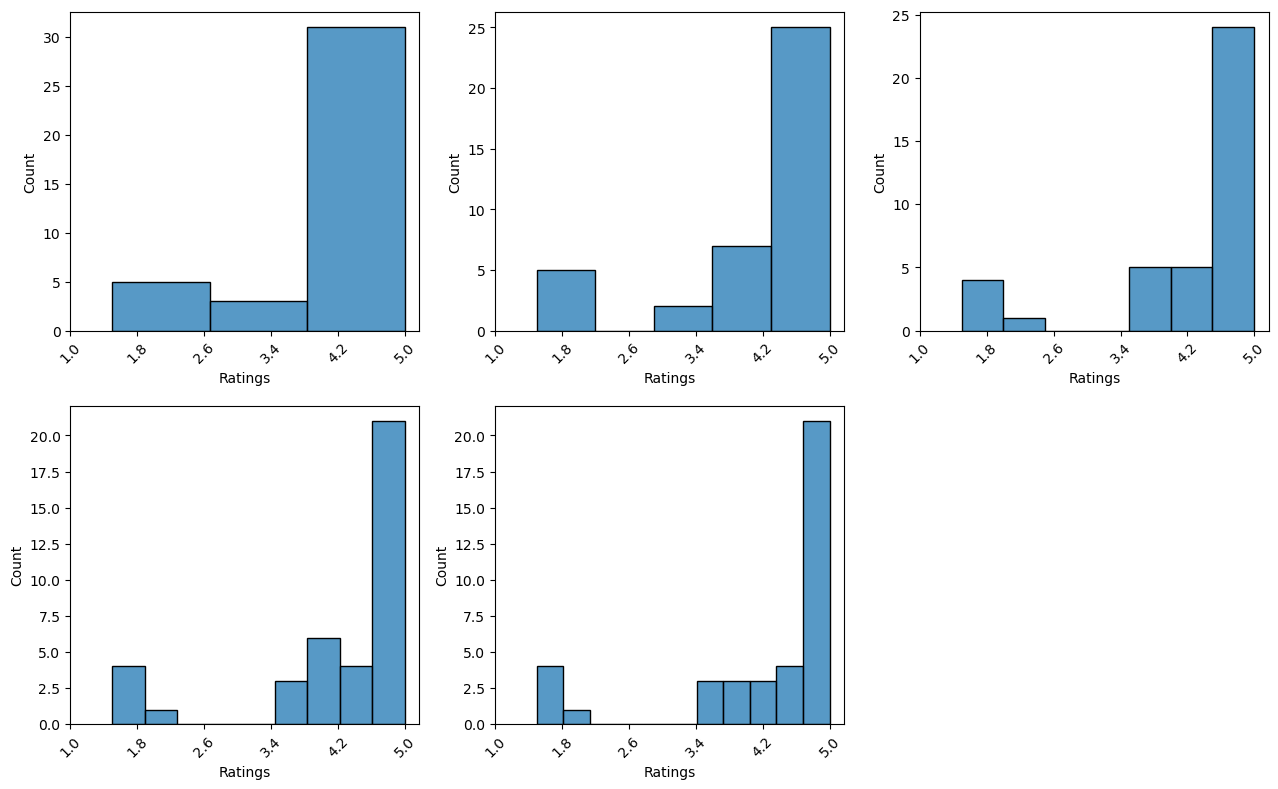

In [10]:
# visualization with histogram
bins = [3,5,7,9,11]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(13,8))
axs = axs.flatten()

for r,b,ax in zip(range(5), bins, axs):
    sns.histplot(data=data['Ratings'], bins=b, ax=ax)
    ax.set_xticks(np.linspace(1,data['Ratings'].max(),6))
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
axs[-1].remove()

#### From the data visualization above, it can be seen that there is no doubt that users rate each boarding house. It was proven that the data was empty in the range of around 2.5 - 3.4, so users rated the cost as very bad / very good, even though the data showed that the majority of users gave a rating of 4-5.

#### Dari visualisasi data diatas, terlihat bahwa tidak ada keraguan para pengguna untuk menilai setiap kos. Itu dibuktikan kosongnya data pada rentang sekitar 2.5 - 3.4, jadi para pengguna menilai jika kos itu jika sangat buruk / sangat baik, meskipun data menunjukkan mayoritas pengguna memberi rating 4-5.

### Harga

In [11]:
data['Harga per Bulan'].min(), data['Harga per Bulan'].max()

(340000, 1000000)

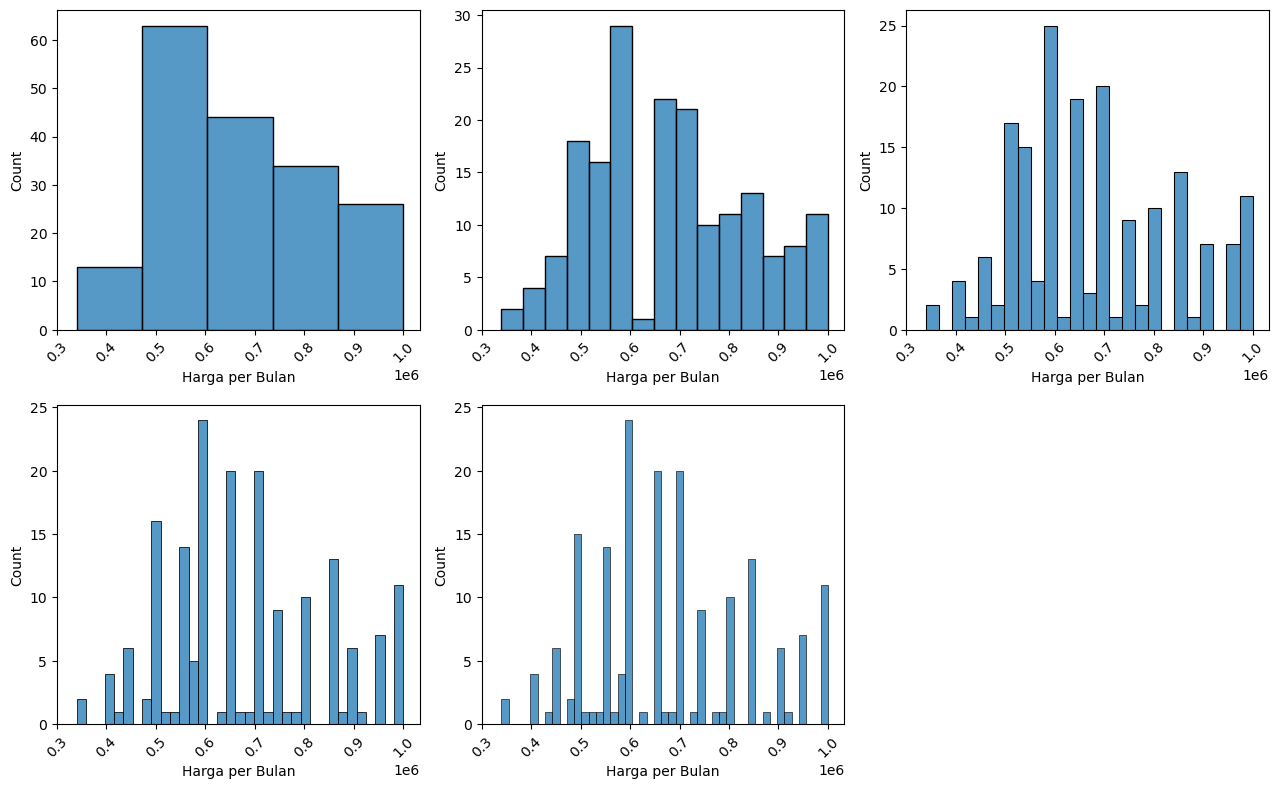

In [12]:
# visualization with histogram
bins = list(range(5,51,10))

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(13,8))
axs = axs.flatten()

for r,b,ax in zip(range(5), bins, axs):
    sns.histplot(data=data['Harga per Bulan'], bins=b, ax=ax)
    ax.set_xticks(np.linspace(300000,data['Harga per Bulan'].max(),8))
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
axs[-1].remove()

#### Facts show that boarding house prices in the city of Malang vary, although the range of 500,000 - 700,000 is still the majority.

#### Fakta menunjukan bahwa harga kos di kota malang beragam, meskipun kisaran 500.000 - 700.000 masih menjadi mayoritas.

# Collect Insight ( Mengumpulkan Insight)

### "Lokasi" & "Harga per Bulan"

In [13]:
corr_loc_price = data.groupby(['Lokasi'])['Harga per Bulan'].agg(['mean','median'])
corr_loc_price.sort_values('mean', ascending=False)

,mean,median
Lokasi,,
Blimbing,744750.000000,690000.0
Klojen,717307.692308,700000.0
Sukun,691818.181818,650000.0
Lowokwaru,673750.000000,650000.0


Show count, mean & median of price based on location


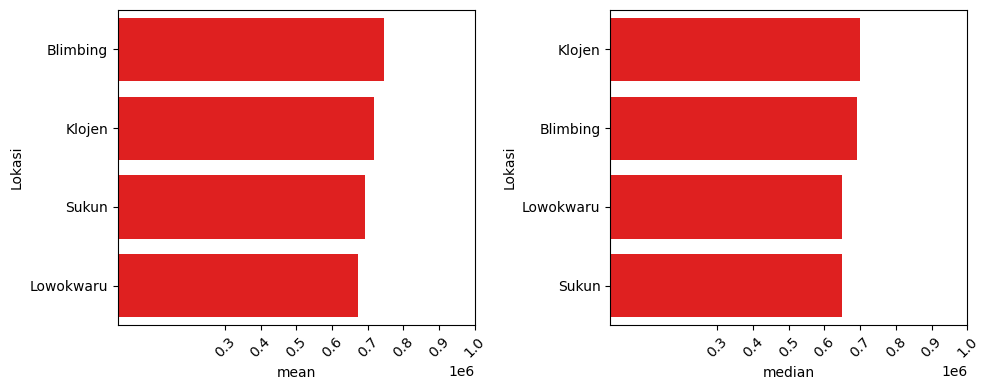

In [14]:
print('Show count, mean & median of price based on location')

# set up figure and axis
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axs = axs.flatten()

# visualization
for c,ax in zip(corr_loc_price.columns,axs):
    DATA = corr_loc_price.sort_values(c, ascending=False)
    sns.barplot(x=c, y=DATA.index, data=DATA, ax=ax, color='red')
    ax.set_xticks(np.linspace(300000, 1000000, 8))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### This is quite confusing because previously I thought that boarding house locations close to the "Lowokwaru" area had prices that were slightly more expensive than others (because they were close to the campus in Malang). But the data shows that my opinion is wrong, the average and median prices of boarding houses in several areas in Malang city tend to be the same.

#### Ini cukup membingungkan karena sebelumnya saya kira lokasi kos yang dekat dengan daerah "Lowokwaru" memiliki harga yang sedikit lebih mahal dari yang lain (karena deket dengan kampus kampus yang ada di malang). Tapi data berbicara bahwa opini saya salah, harga rata rata dan median dari kos yang ada dalam beberapa daerah di kota malang cenderung sama.

Show histogram of price by each location


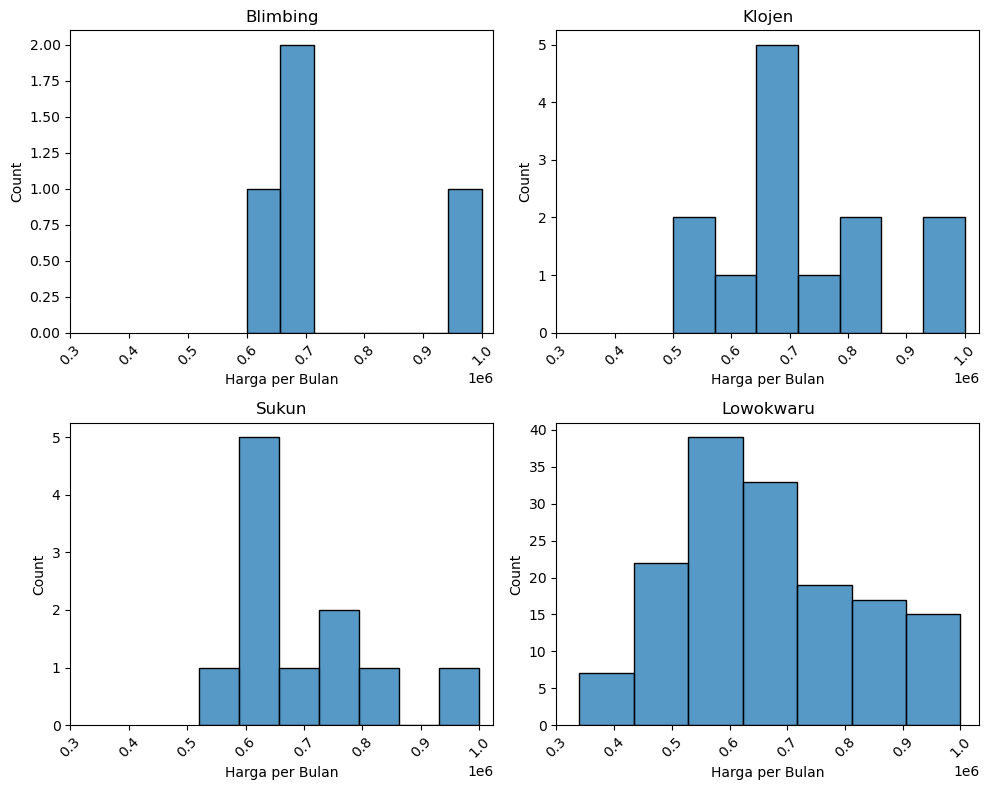

In [15]:
print('Show histogram of price by each location')

# unique of location
loc = corr_loc_price.sort_values('mean', ascending=False).index.tolist() # i want to show by count (descending)

# set up figure and axis
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
axs = axs.flatten()

# visualization
for v,ax in zip(loc,axs):
    DATA = data[data['Lokasi'] == v]
    sns.histplot(data=DATA['Harga per Bulan'], bins=7, ax = ax)
    ax.set_xticks(np.linspace(300000, 1000000, 8))
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(v)

plt.tight_layout()
plt.show()

#### Because I was still curious, I made a visualization of the distribution of cost price data (histogram) and I still didn't find any new facts.

#### Karena masih penasaran aku buat visualisasi persebaran data harga kos (histogram) dan aku tetap tidak menemukan fakta baru.

### Fasilitas & Harga => Bar plot

In [16]:
facility_uniques = data_facilities.keys()
facility_uniques

dict_keys(['WiFi', 'Kasur', 'Akses 24 Jam', 'K. Mandi Dalam', 'Kloset Duduk', 'AC'])

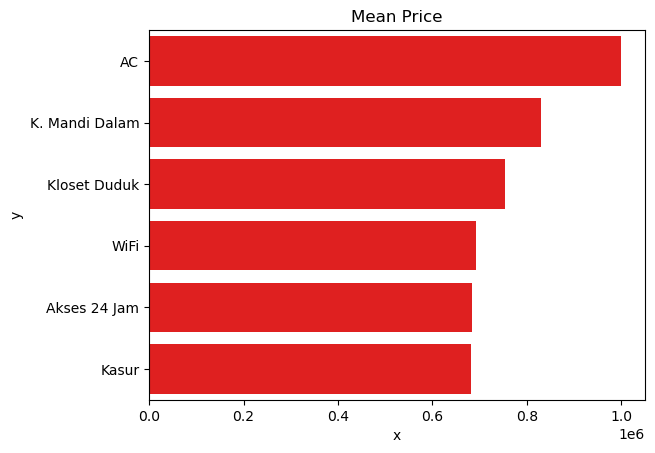

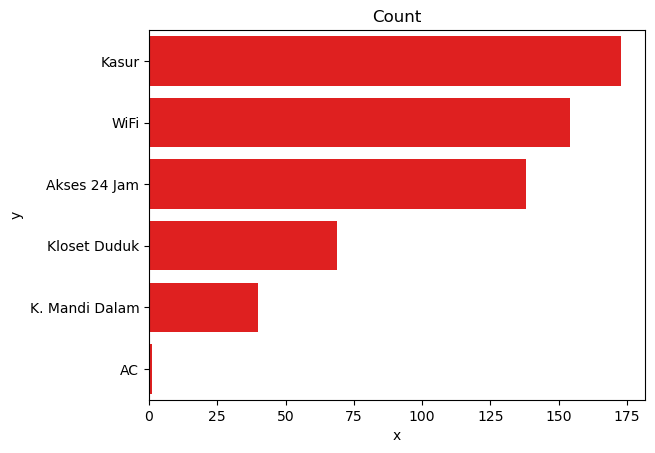

In [17]:
# list for new data
price_by_facility = []
count_by_facility= []

# get data
for f in facility_uniques:
    # list for new data
    data_index = []
    
    # get each unique value data
    for i in data.index:
        d = data.loc[i,'Fasilitas']
        if f in d:
            data_index.append(i)
        else:
            continue
    
    DATA = data.loc[data_index]
    price_by_facility.append(DATA['Harga per Bulan'].mean())
    count_by_facility.append(len(DATA))


# data visualization    
df = []
for d,t in zip([price_by_facility, count_by_facility],['Mean Price', 'Count']):
    
    # make dataframe for visualization
    DATA = pd.DataFrame({
        'x' : d,
        'y' : facility_uniques
    }).sort_values('x', ascending=False)
    
    df.append(DATA) # get dataframe
    
    # visualization
    sns.barplot(x='x', y='y', data=DATA, color='red')
    plt.title(t)
    plt.show()

#### I like this fact, because it is in line with my opinion. It is quite reasonable that boarding houses which have AC are priced quite high (as proven by the data above) followed by private bathrooms in second place and also the majority of boarding houses have mattresses, wifi and 24 hour access.

#### Fakta kali ini saya suka, karena sejalan dengan opini saya. Cukup masuk akal jika kos yang memiliki AC dibandrol dengan harga yang cukup tinggi (di buktikan dari data diatas) disusul dengan kamar mandi dalam di urutan kedua dan juga mayoritas kos memiliki fasilitas kasur, wifi dan akses 24 jam.

## Check Max Price in dataset (Cek harga tertinggi yang ada di dataset)

In [18]:
# max price
data['Harga per Bulan'].max()

1000000

In [19]:
# check mean price by facility
df[0]

,x,y
5,1000000.000000,AC
3,830000.000000,K. Mandi Dalam
4,754086.956522,Kloset Duduk
0,691649.350649,WiFi
2,684666.666667,Akses 24 Jam
1,680658.959538,Kasur


In [20]:
# check data that have AC in 'Fasilitas'
a = 0
for i in data.index:
    D = data.loc[i, 'Fasilitas']
    d = D.split(', ')
    if 'AC' in d:
        a += 1
    else:
        continue
print(a)

1


#### A new fact was discovered which states that there are only 2 boarding houses that have AC facilities from this data and both of them are priced at 1,000,000, this is proven by the average price being 1,000,000 and the highest value from the data is 1,000,000

#### Ditemukan fakta baru yang menyebut bahwa, hanya ada 2 kos yang memiliki fasilitas AC dari data tersebut dan kedua nya dibandrol dengan harga 1.000.000, itu dibuktikan dengan harga rata rata 1.000.000 dan nilai tertinggi dari data adalah 1.000.000

## Mean price by Ratings

In [21]:
# define down & high by ratings
down = data[data['Ratings']<=3]
high = data[data['Ratings']>3]
missing = data[data['Ratings'].isna()]

# show mean of both
d = down['Harga per Bulan'].mean()
h = high['Harga per Bulan'].mean()
m = missing['Harga per Bulan'].mean()

print('Mean Price')
print(f'Bad review : {round(d)}')
print(f'Nice review : {round(h)}')
print(f'Missing review : {round(m)}')

Mean Price
Bad review : 549000
Nice review : 704118
Missing review : 678291


#### This is a valuable fact, this is in line with user reviews. Boarding houses that have a good rating (>3) have an average price of around 700,000, those with no reviews are around 677,000 and those with bad reviews only have an average of around 550,000.

#### Ini fakta berharga, ini sejalan dengan review dari pengguna. Kos yang memiliki rating bagus (>3) memiliki harga rata rata sekitar 700.000, yang tidak di ada review sekitar 677.000 dan yang memiliki review buruk hanya memiliki rata rata sekitar 550.000.

## Count "Fasilitas" vs "Harga per Bulan"

In [22]:
# modified data
df_CF = data[['Fasilitas','Harga per Bulan']].copy(deep=True)

for i in df_CF.index:
    CF = len(df_CF.loc[i, 'Fasilitas'].split(', '))
    df_CF.loc[i, 'Fasilitas'] = CF

df_CF.head()

,Fasilitas,Harga per Bulan
0,3,600000
1,5,950000
2,4,1000000
3,1,500000
4,3,950000


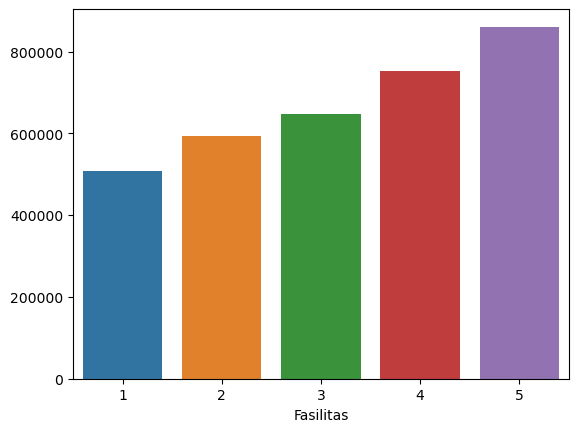

In [23]:
CF_grouped = df_CF.groupby(['Fasilitas'])['Harga per Bulan'].mean()
sns.barplot(x=CF_grouped.index, y=CF_grouped.values)
plt.show()

#### The last fact that I might get, is that the more facilities provided, the more expensive the price of the boarding house

#### Fakta terakhir  yang mungkin saya dapat, jadi semakin banyak fasilitas yang diberikan maka harga dari kos tersebut semakin mahal

#### _________________________________________________________________________________________________

# Conclusion

## from taking insights from this data, I obtained information that:
#### 1. The majority of boarding house locations from this data are in Lowokwaru (85%)
#### 2. Facilities that are often found in Malang city boarding houses are Wifi, mattresses & 24 hour access
#### 3. Only a few boarding houses have complete 6/6 facilities
#### 4. Boarding house prices in the city of Malang vary greatly, but the price range of 500,000 - 700,000 is still the majority.
#### 5. The average and median prices of boarding houses in several areas in Malang city tend to be the same.
#### 6. Boarding houses that have AC are priced quite high.
#### 7. Boarding houses that have a good rating (>3) have quite high prices when compared to boarding houses with bad reviews (<=3)
#### 8. More facilities provided, the more expensive the price of the boarding house

# Kesimpulan

## dari pengambilan insight dari data ini, saya memperoleh informasi bahwa :
#### 1. Lokasi kos dari data ini mayoritas berada di Lowokwaru (85%)
#### 2. Fasilitas yang banyak ditemui di kos kota malang yaitu Wifi, Kasur & Akses 24 jam
#### 3. Cuma beberapa kos yang memiliki fasilitas lengkap 6/6
#### 4. Harga kos di kota malang sangat beragam, tapi harga kisaran 500.000 - 700.000 masih menjadi mayoritas.
#### 5. Harga rata rata dan median dari kos yang ada dalam beberapa daerah di kota malang cenderung sama.
#### 6. Kos yang memiliki AC dibandrol dengan harga yang cukup tinggi.
#### 7. Kos yang memiliki rating bagus (>3) memiliki harga cukup tinggi jika dibandingkan dengan kos dengan ulasan yang buruk (<=3)
#### 8. Semakin banyak fasilitas yang diberikan maka harga dari kos tersebut semakin mahal